# Renewable Energy Data EDA

### Import to dataframes

In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Postcode data (SSI = small scale installations, SGU = small generation unit, SWH = Solar water heating )
df_SSI_SGU_Hydro = pd.read_csv("data/PostCode Data/Postcode data for small-scale installations - SGU-Hydro.csv")
df_SSI_SGU_Solar = pd.read_csv("data/PostCode Data/Postcode data for small-scale installations - SGU-Solar.csv")
df_SSI_SGU_Wind = pd.read_csv("data/PostCode Data/Postcode data for small-scale installations - SGU-Wind.csv")
df_SSI_SWH_Air_source_heat_pump = pd.read_csv("data/PostCode Data/Postcode data for small-scale installations - SWH-Air-source-heat-pump.csv")
df_SSI_SWH_Solar = pd.read_csv("data/PostCode Data/Postcode data for small-scale installations - SWH-Solar.csv")

# Battery installations with SSI by state
df_battery_installations = pd.read_csv("data/PostCode Data/State data for battery installations with small-scale systems.csv")

# Australian postcode data reference dataset
df_AU_postcode_dataset = pd.read_excel("data/australian_postcodes.xlsx")

# Whole REC database (REC = renewable energy certificate)
df_REC_database = pd.read_csv("data/wholeRECdatabase_20230120_no_dups.csv",encoding='cp1252')

In [165]:
df_list = [
df_SSI_SGU_Hydro,
df_SSI_SGU_Solar,
df_SSI_SGU_Wind,
df_SSI_SWH_Air_source_heat_pump,
df_SSI_SWH_Solar,
df_battery_installations,
df_AU_postcode_dataset,
df_REC_database
]

for idx, df in enumerate(df_list, start=1):
    print(f"DataFrame {idx} - Name: {df.name if hasattr(df, 'name') else 'Unnamed'}, Shape: {df.shape}")

DataFrame 1 - Name: Unnamed, Shape: (20, 7)
DataFrame 2 - Name: Unnamed, Shape: (2806, 41)
DataFrame 3 - Name: Unnamed, Shape: (253, 5)
DataFrame 4 - Name: Unnamed, Shape: (2610, 21)
DataFrame 5 - Name: Unnamed, Shape: (2964, 21)
DataFrame 6 - Name: Unnamed, Shape: (10, 10)
DataFrame 7 - Name: Unnamed, Shape: (18513, 33)
DataFrame 8 - Name: Unnamed, Shape: (6271416, 17)


In [166]:
df_REC_database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6271416 entries, 0 to 6271415
Data columns (total 17 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Status                       object 
 1   Owner                        object 
 2   Accreditation_Code           object 
 3   Fuel_Source_Active           bool   
 4   Fuel_Source_Type             object 
 5   Fuel_Source_Display_Name     object 
 6   Generation_Year              int64  
 7   Status.1                     object 
 8   Start_Serial                 float64
 9   End_Serial                   float64
 10  State                        object 
 11  Owner_Name                   object 
 12  Creation_Year                int64  
 13  Range_ID                     int64  
 14  Creation_Date                object 
 15  Public_Registered_Person_ID  int64  
 16  Created_By                   object 
dtypes: bool(1), float64(2), int64(4), object(10)
memory usage: 771.5+ MB


In [167]:
df_compare_systems = pd.DataFrame([], columns=['Type','Locations','System Quantity', 'KW'])

In [168]:
sgu_hydro = df_SSI_SGU_Hydro["Small Unit Installation Postcode"].drop_duplicates()

postcodes = sgu_hydro.shape[0]
quantity = sum(df_SSI_SGU_Hydro["Previous Years (2001-2021) - Installation Quantity"])
kw = round(sum(df_SSI_SGU_Hydro["Previous Years (2001-2021) - SGU Output Rated Output In kW"]),2)

print(postcodes, "unique hydro postcodes")
print(quantity, "total hydro units")
print(kw , "total hydro kw")

hydro_df = pd.DataFrame([["Hydro",postcodes, quantity, kw]],columns=['Type', 'Locations','System Quantity', 'KW'])
df_compare_systems = pd.concat([df_compare_systems, hydro_df])
df_compare_systems



20 unique hydro postcodes
20 total hydro units
50.7 total hydro kw


,Type,Locations,System Quantity,KW
0,Hydro,20,20,50.7


In [169]:
sgu_solar = df_SSI_SGU_Solar["Small Unit Installation Postcode"].drop_duplicates()

postcodes = sgu_solar.shape[0]
quantity = sum(df_SSI_SGU_Solar["Previous Years (2001-2021) - Installation Quantity"])
kw = round(sum(df_SSI_SGU_Solar["Previous Years (2001-2021) - SGU Output Rated Output In kW"]),2)

print(postcodes, "unique solar postcodes")
print(quantity, "total solar units")
print(kw , "total solar kw")

solar_df = pd.DataFrame([["Solar",postcodes, quantity, kw]],columns=['Type', 'Locations','System Quantity', 'KW'])
df_compare_systems = pd.concat([df_compare_systems, solar_df])
df_compare_systems


2806 unique solar postcodes
3073708 total solar units
16519611.88 total solar kw


,Type,Locations,System Quantity,KW
0,Hydro,20,20,50.70
0,Solar,2806,3073708,16519611.88


In [170]:
sgu_wind = df_SSI_SGU_Wind["Small Unit Installation Postcode"].drop_duplicates()

postcodes = sgu_wind.shape[0]
quantity = sum(df_SSI_SGU_Wind["Previous Years (2001-2021) - Installation Quantity"])
kw = round(sum(df_SSI_SGU_Wind["Previous Years (2001-2021) - SGU Output Rated Output In kW"]),2)

print(postcodes, "unique wind postcodes")
print(quantity, "total wind units")
print(kw , "total wind kw")

wind_df = pd.DataFrame([["Wind",postcodes, quantity, kw]],columns=['Type', 'Locations','System Quantity', 'KW'])
df_compare_systems = pd.concat([df_compare_systems, wind_df])
df_compare_systems


253 unique wind postcodes
424 total wind units
1468.67 total wind kw


,Type,Locations,System Quantity,KW
0,Hydro,20,20,50.70
0,Solar,2806,3073708,16519611.88
0,Wind,253,424,1468.67


In [173]:
swh_hp = df_SSI_SWH_Air_source_heat_pump["Small Unit Installation Postcode"].drop_duplicates()

postcodes = swh_hp.shape[0]
quantity = sum(df_SSI_SWH_Air_source_heat_pump["Previous Years (2001-2021) - Installation Quantity"])
kw = 0 # no kw column

print(postcodes, "unique heat-pump postcodes")
print(quantity, "total heat-pump units")
print(kw , "total heat-pump kw")

hp_df = pd.DataFrame([["Heat-pump",postcodes, quantity, kw]],columns=['Type', 'Locations','System Quantity', 'KW'])
df_compare_systems = pd.concat([df_compare_systems, hp_df])
df_compare_systems


2610 unique heat-pump postcodes
365635 total heat-pump units
0 total heat-pump kw


,Type,Locations,System Quantity,KW
0,Hydro,20,20,50.70
0,Solar,2806,3073708,16519611.88
0,Wind,253,424,1468.67
0,Heat-pump,2610,365635,0.00


In [174]:
swh_solar = df_SSI_SWH_Solar["Small Unit Installation Postcode"].drop_duplicates()

postcodes = swh_solar.shape[0]
quantity = sum(df_SSI_SWH_Solar["Previous Years (2001-2021) - Installation Quantity"])
kw = 0 # no kw column

print(postcodes, "unique swh-solar postcodes")
print(quantity, "total swh-solar units")
print(kw , "total swh-solar kw")

swh_solar_df = pd.DataFrame([["SWH-Solar",postcodes, quantity, kw]],columns=['Type', 'Locations','System Quantity', 'KW'])
df_compare_systems = pd.concat([df_compare_systems, swh_solar_df])
df_compare_systems


2964 unique swh-solar postcodes
1036390 total swh-solar units
0 total swh-solar kw


,Type,Locations,System Quantity,KW
0,Hydro,20,20,50.70
0,Solar,2806,3073708,16519611.88
0,Wind,253,424,1468.67
0,Heat-pump,2610,365635,0.00
0,SWH-Solar,2964,1036390,0.00


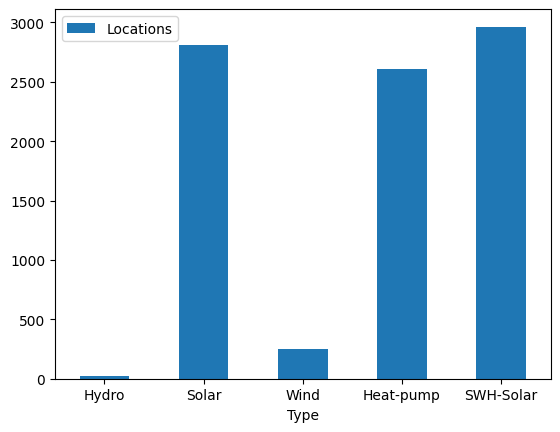

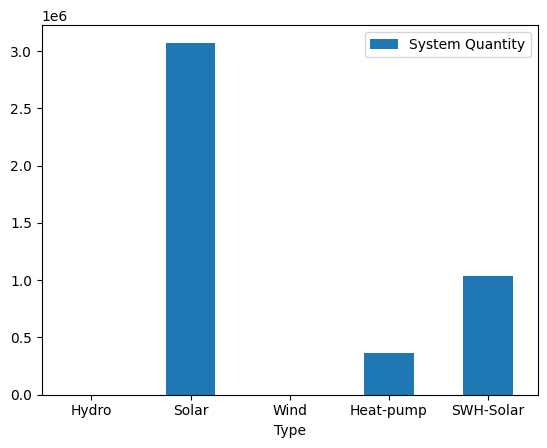

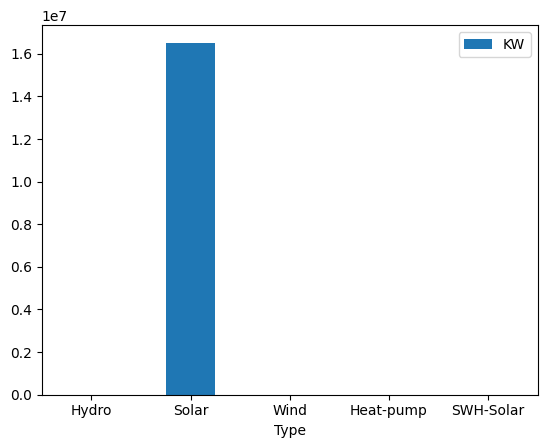

In [191]:
df_compare_systems[["Locations","System Quantity","KW"]] = df_compare_systems[["Locations","System Quantity","KW"]].apply(pd.to_numeric)
Locations_graph = df_compare_systems.plot.bar(x='Type', y='Locations', rot=0)
System_Quantity_graph = df_compare_systems.plot.bar(x='Type', y='System Quantity', rot=0)
kW_graph = df_compare_systems.plot.bar(x='Type', y='KW', rot=0)


### From this, there are two questions:

1- Do swh units not produce KW or is it simply not included in the datset?

2- Is the observed KW value already calculated based on the system quantity, or should the two be multiplied to find the overall kw production per postcode?


### The main observations

1- Most locations that have solar panels will also have a solar water heating which makes intuitive sense.

2- In a given household you may have 1 heat pump and 1 SWH-solar but many panels which explains the quantity difference.

3- It's very rare for residential properties to have wind or hydro which explains the low numbers compared to solar.

4- Between 2001 and 2021 (The last 20 years), Australian residents installed around 16 Million kW of solar energy, 1500kW of Wind energy, and 50kW of hydro energy.
